# Load the Dataset

In [2]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
file_path = "crowdsourcing_task_allocation.csv"  # Ensure this is the correct path
df = pd.read_csv("crowdsourcing_task_allocation.csv")

# Step 3: Display the first few rows of the dataset
df.head()


,Task_ID,Worker_ID,Task_Difficulty,Worker_Skill_Level,Task_Completion_Time,Performance_Score,Quality_Score
0,1,13,1,3,7.17,7,6
1,2,11,4,3,105.18,7,9
2,3,8,4,3,97.84,9,2
3,4,4,3,3,54.69,2,1
4,5,1,2,4,94.71,9,4


# Data Visualization using Matplotlib

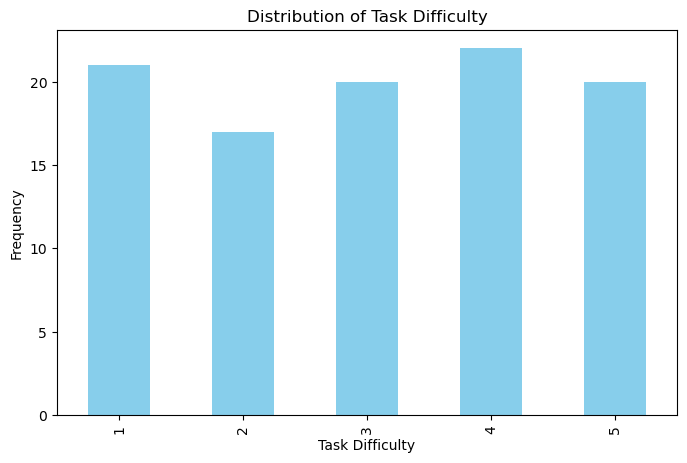

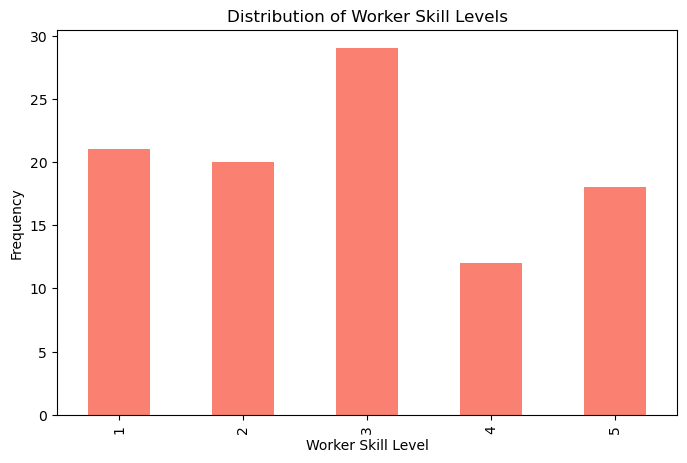

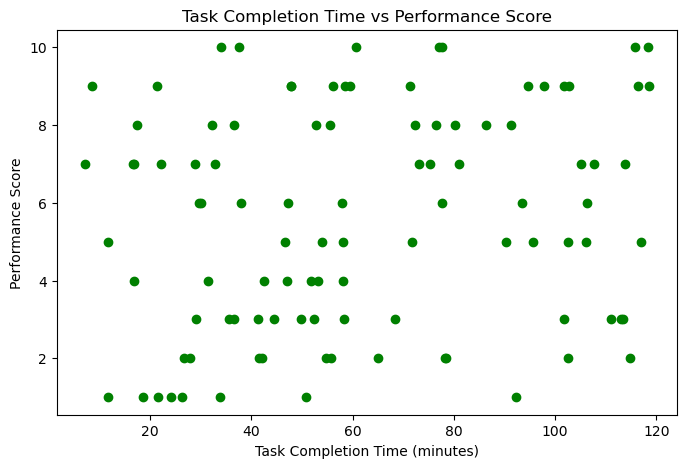

In [4]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt

# Step 2: Bar graph to visualize the distribution of Task Difficulty
plt.figure(figsize=(8, 5))
df['Task_Difficulty'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Task Difficulty')
plt.xlabel('Task Difficulty')
plt.ylabel('Frequency')
plt.show()

# Step 3: Bar graph to visualize the distribution of Worker Skill Levels
plt.figure(figsize=(8, 5))
df['Worker_Skill_Level'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribution of Worker Skill Levels')
plt.xlabel('Worker Skill Level')
plt.ylabel('Frequency')
plt.show()

# Step 4: Scatter plot for Task Completion Time vs Performance Score
plt.figure(figsize=(8, 5))
plt.scatter(df['Task_Completion_Time'], df['Performance_Score'], color='green')
plt.title('Task Completion Time vs Performance Score')
plt.xlabel('Task Completion Time (minutes)')
plt.ylabel('Performance Score')
plt.show()


# Task Allocation (Decision Tree Classifier)

In [9]:
# Step 1: Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Define features and target for task allocation
X = df[['Task_Difficulty', 'Worker_Skill_Level']]  # Features: Task Difficulty and Worker Skill Level
y = df['Worker_ID']  # Target: Worker_ID (which worker to allocate)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Step 5: Make predictions and evaluate accuracy
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Display the accuracy
print(f"Task Allocation Model Accuracy: {accuracy * 100:.2f}%")


Task Allocation Model Accuracy: 6.67%


# Performance Analysis (Linear Regression)

Performance Analysis Model MSE: 1010.67


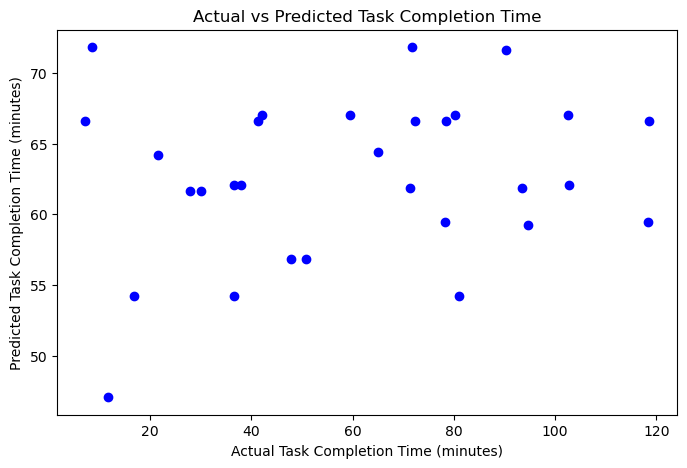

In [12]:
# Step 1: Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Define features and target for performance analysis
X = df[['Task_Difficulty', 'Worker_Skill_Level']]  # Features: Task Difficulty and Worker Skill Level
y = df['Task_Completion_Time']  # Target: Task Completion Time

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Step 6: Display the Mean Squared Error (MSE)
print(f"Performance Analysis Model MSE: {mse:.2f}")

# Step 7: Visualize the prediction vs actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Task Completion Time')
plt.xlabel('Actual Task Completion Time (minutes)')
plt.ylabel('Predicted Task Completion Time (minutes)')
plt.show()


# Quality Control (Logistic Regression)

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.45      0.36      0.40        14

    accuracy                           0.50        30
   macro avg       0.49      0.49      0.49        30
weighted avg       0.49      0.50      0.49        30



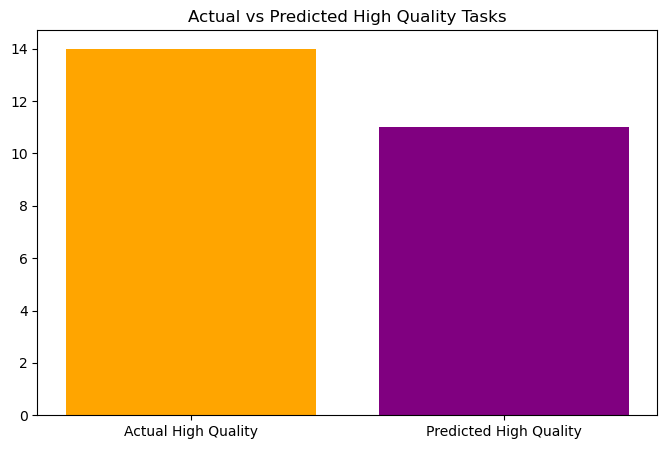

In [15]:
# Step 1: Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 2: Create a new column for High (1) or Low (0) Quality based on Quality Score
df['High_Quality'] = (df['Quality_Score'] > 5).astype(int)  # 1 for Quality > 5, 0 otherwise

# Step 3: Define features and target for quality control
X = df[['Task_Difficulty', 'Worker_Skill_Level', 'Performance_Score']]  # Features
y = df['High_Quality']  # Target: High Quality (1 or 0)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 7: Visualize the results using a bar graph for predicted vs actual high-quality tasks
plt.figure(figsize=(8, 5))
plt.bar(['Actual High Quality', 'Predicted High Quality'], [y_test.sum(), y_pred.sum()], color=['orange', 'purple'])
plt.title('Actual vs Predicted High Quality Tasks')
plt.show()


In [17]:
import pickle

# Saving models
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_classifier, f)

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)
